# Blob Classification with Keras

In [1]:
# This tutorial will give you a basic introduction for using machine learning for a classification problem

## Import Libraries - Data Processing and Visualization

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

## Import Libraries - Machine Learning (Keras)

In [3]:
# Keras is a high-level API for tensorflow. This helps you abstract another layer of computation away from the problem.
# This means that implementing problems can be quick and easy, but it requires less understanding of principles.

In [4]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import binary_crossentropy
from keras.optimizers import Adam

Using TensorFlow backend.


### Define constants for the script

In [5]:
NAME = "KERAS-FEED-FORWARD-1" # good to have descriptive name for models incase you tweak parameters
NUM_EPOCHS = 20
FIRST_LAYER_NODES = 10
SECOND_LAYER_NODES = 10
THIRD_LAYER_NODES = 10
OUTPUT_LAYER_NODES = 1

In [6]:
# Get the data for the classification problem
# Use of a library method that allows us to get a random distribution of X group of points (blobs)

In [7]:
data = make_blobs(n_samples=200,n_features=2,centers=2,random_state=101)

In [8]:
# What the data consists of
data[0][:5] # X and Y coordinates

array([[-10.26167723,  -7.06350819],
       [ -2.40902204,   2.93591385],
       [ -7.76150458,  -5.08941917],
       [-11.14547808,  -5.21952108],
       [-10.51163375,  -6.56992184]])

In [9]:
data[1][:5] # Class label

array([1, 0, 1, 1, 1])

In [10]:
# Store the X and Y coordinates so they can be visually seen afterwards
features = data[0]

### Visualization of the problem

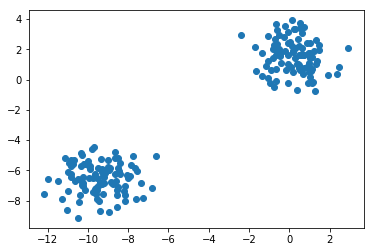

In [11]:
%matplotlib inline
plt.scatter(features[:,0],features[:,1])

In [12]:
# get the class labels for the 2 groups of Blobs shown above
labels = data[1]

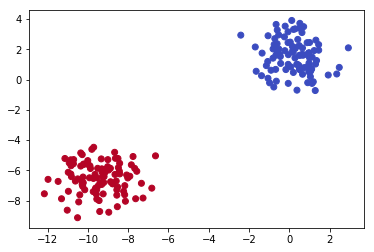

In [13]:
plt.scatter(features[:,0],features[:,1], c=labels,cmap='coolwarm')

### Setting up for Machine Learning

In [14]:
# We begin with splitting the data into a train and test distribution, this is used to validate training progress
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.2, random_state=101)
print(len(xtrain)) # how many training samples
print(len(xtest)) # how many validation samples

160
40


In [15]:
### Keras Model for Training

In [16]:
# Initialize the type of model to be created: sequential
model = Sequential()

# We are using 3 hidden layers all with relu activation and an output layer with sigmoid activation as 
# we are doing binary classification
model.add(Dense(FIRST_LAYER_NODES,
                input_shape=xtrain.shape[1:],
                activation='relu'))

model.add(Dense(SECOND_LAYER_NODES,
                activation='relu'))

model.add(Dense(THIRD_LAYER_NODES,
                activation='relu'))
model.add(Dense(OUTPUT_LAYER_NODES,
                activation='sigmoid'))



In [17]:
# Instantiate the parameters for the learning of the algorithm; the values chosen are default/ the standard
model.compile(loss=binary_crossentropy,
            optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999),
            metrics=['accuracy'])

In [18]:
# Begin the training of the model
model.fit(xtrain,
          ytrain,
          epochs=NUM_EPOCHS,
          batch_size=1,
          validation_data=(xtest,ytest))

Train on 160 samples, validate on 40 samples
Epoch 1/20
160/160 [==============================] - 1s 6ms/step - loss: 0.8248 - acc: 0.5000 - val_loss: 0.6367 - val_acc: 0.5000
Epoch 2/20
160/160 [==============================] - 1s 3ms/step - loss: 0.5657 - acc: 0.7750 - val_loss: 0.4528 - val_acc: 1.0000
Epoch 3/20
160/160 [==============================] - 1s 3ms/step - loss: 0.4140 - acc: 0.9875 - val_loss: 0.3406 - val_acc: 1.0000
Epoch 4/20
160/160 [==============================] - 0s 3ms/step - loss: 0.3249 - acc: 0.9875 - val_loss: 0.2726 - val_acc: 1.0000
Epoch 5/20
160/160 [==============================] - 1s 3ms/step - loss: 0.2707 - acc: 0.9938 - val_loss: 0.2315 - val_acc: 1.0000
Epoch 6/20
160/160 [==============================] - 1s 3ms/step - loss: 0.2345 - acc: 0.9938 - val_loss: 0.2004 - val_acc: 1.0000
Epoch 7/20
160/160 [==============================] - 0s 3ms/step - loss: 0.2055 - acc: 0.9938 - val_loss: 0.1747 - val_acc: 1.0000
Epoch 8/20
160/160 [===========

In [19]:
# Save the model once complete
model.save("{}.keras".format(NAME))

## Validating the training

In [20]:
# now we want to determine if the model is accurate by testing it out on some new data

In [21]:
# we will use same random state so that the distribution of the data is consistent
# However, we will retrieve more samples than previous and only use values from the end for predcition (new values)
data2 = make_blobs(n_samples=440,n_features=2,centers=2,random_state=101)

In [22]:
# perform the train test split again on this larget set of data

In [23]:
xtrain2, _, _, _ = train_test_split(data2[0][-30:],data2[1][-30:], test_size=0.01, random_state=101)

In [24]:
# For prediction, we must pass in an array of the same shape as the one we did for training
predictions = model.predict(xtrain2)

In [25]:
# Depiction of a few of the predictions:
predictions[:4]

array([[0.99252594],
       [0.9930161 ],
       [0.97985804],
       [0.9892146 ]], dtype=float32)

In [26]:
# Now we will round off these predictions: 0 being class A and 1 being class B
predictions = np.array([round(i[0]) for i in predictions.tolist()])

In [27]:
# Quick check to make sure the values calculated are of the same shape; one-to-one relationship
a,b,c = xtrain2[:,0], xtrain2[:,1], predictions
assert (a.shape == b.shape == c.shape)
print("X, Y and Labels are all of same shape.")

X, Y and Labels are all of same shape.


In [28]:
# Demonstrate the results of training

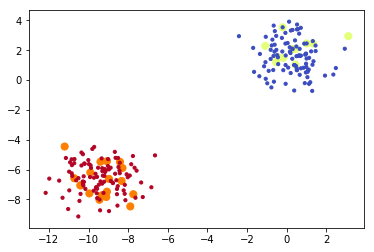

In [29]:
plt.scatter(a,b,s=50,c=c,cmap='Wistia')
plt.scatter(features[:,0],features[:,1], s=10,c=labels,cmap='coolwarm')
plt.show()

## Congragulations on finishing your first ANN Model!